In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple


In [2]:
results_df = pd.read_csv('dataset/results.csv')
drivers_df = pd.read_csv('dataset/drivers.csv')
races_df  = pd.read_csv('dataset/races.csv')

In [3]:
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [5]:
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [6]:
# only accept results that have status : 1 , 11 , 12 , 13
# which is equivalent to    1: finished with the race leader
#                           11: finished with +1 laps to go
#                           12: finished with +2 laps to go
#                           13: finished with +3 laps to go
results_cleaned_df = results_df[results_df['statusId'].isin([1,11,12,13])]

In [7]:
# from results , remove races that have position more than 29 as they are really rare and can be considered as outliers
# remove rows with //N
results_cleaned_df = results_cleaned_df[results_df['position']!= '\\N']
results_cleaned_df['position'] = results_cleaned_df['position'].astype(int)
results_cleaned_df = results_cleaned_df[results_cleaned_df['position'] < 29]

/tmp/ipykernel_41746/1091916032.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results_cleaned_df = results_cleaned_df[results_df['position']!= '\\N']
/tmp/ipykernel_41746/1091916032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_cleaned_df['position'] = results_cleaned_df['position'].astype(int)


In [8]:
# unque
results_cleaned_df['position'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [9]:
# as we need the position of each driver in all races
# we will join the results_df with drivers_df in driverId

dirvers_w_results_df = pd.merge(results_cleaned_df, drivers_df, on='driverId')

In [10]:
dirvers_w_results_df.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1,18,1,1,22,1,1,1,1,10.0,...,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,...,209.033,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,...,203.969,11,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,...,204.323,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,...,222.085,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton


In [11]:
# join with races on raceId

drivers_w_results_w_races = pd.merge(dirvers_w_results_df,races_df,on='raceId')

In [12]:
drivers_w_results_w_races.head()
# save the data
drivers_w_results_w_races.to_csv('temp.csv')

In [13]:
# frequanecy of positions of races
drivers_w_results_w_races['position'].value_counts()

3     1084
2     1084
1     1082
4     1069
5     1036
6     1005
7      955
8      909
9      836
10     757
11     676
12     601
13     515
14     444
15     379
16     298
17     218
18     142
19      84
20      43
21      21
22      10
23       5
24       1
Name: position, dtype: int64

In [14]:
drivers_w_results_w_races.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,18,2,2,3,5,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,18,3,3,7,7,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,18,4,4,5,11,4,4,4,5.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [15]:
# needed to store the year for each race in order to do analyse the peroformance of the driver in each seaseon
# by getting the avg position of each season which then will help the teams to know which seasons their drivers did well
# so they would study what happened in that season and try to repeat it
racers_dict: Dict[int, List[Tuple[int,int]]] = {} # each racer store his (position_of_race, year_of_race)
drivers_set = set()
# itterate over rows of drivers_w_results_w_races
for index,row in drivers_w_results_w_races.iterrows():
    drivers_set.add(row['driverId'])
    if row['driverId'] in racers_dict:
        racers_dict[row['driverId']].append((row['position'],row['year']))
    else:
        racers_dict[row['driverId']] = [(row['position'],row['year'])]


In [16]:
racers_avg_pos_dict : Dict[int, float] = {}
for key, value in racers_dict.items():
    racers_avg_pos_dict[key] = sum([x[0] for x in value])/len(value)
    

In [17]:
for key, value in racers_avg_pos_dict.items():
    print(f'id={key}, avg_pos={value}, name={drivers_df[drivers_df["driverId"]==key]["forename"].values[0]} {drivers_df[drivers_df["driverId"]==key]["surname"].values[0]}')

id=1, avg_pos=3.2071428571428573, name=Lewis Hamilton
id=2, avg_pos=8.113636363636363, name=Nick Heidfeld
id=3, avg_pos=6.228571428571429, name=Nico Rosberg
id=4, avg_pos=5.896797153024911, name=Fernando Alonso
id=5, avg_pos=11.795454545454545, name=Heikki Kovalainen
id=6, avg_pos=12.10344827586207, name=Kazuki Nakajima
id=8, avg_pos=6.046931407942238, name=Kimi Räikkönen
id=9, avg_pos=9.357142857142858, name=Robert Kubica
id=15, avg_pos=9.025157232704403, name=Jarno Trulli
id=17, avg_pos=6.416666666666667, name=Mark Webber
id=14, avg_pos=5.674846625766871, name=David Coulthard
id=18, avg_pos=7.052173913043478, name=Jenson Button
id=12, avg_pos=10.470588235294118, name=Nelson Piquet Jr.
id=21, avg_pos=7.928104575163399, name=Giancarlo Fisichella
id=22, avg_pos=6.950892857142857, name=Rubens Barrichello
id=19, avg_pos=14.153846153846153, name=Anthony Davidson
id=11, avg_pos=11.038461538461538, name=Takuma Sato
id=13, avg_pos=7.098214285714286, name=Felipe Massa
id=10, avg_pos=13.625, na

In [18]:
# get the top 10 values
top_10=sorted(racers_avg_pos_dict.items(), key=lambda x: x[1])[:50]
# print them all
for i in top_10:
    print(f'id={i[0]}, avg_pos={i[1]}, name={drivers_df[drivers_df["driverId"]==i[0]]["forename"].values[0]} {drivers_df[drivers_df["driverId"]==i[0]]["surname"].values[0]}')


id=657, avg_pos=1.0, name=Bill Vukovich
id=579, avg_pos=1.7317073170731707, name=Juan Fangio
id=373, avg_pos=1.9210526315789473, name=Jim Clark
id=786, avg_pos=2.0, name=Luigi Fagioli
id=591, avg_pos=2.0, name=George Amick
id=701, avg_pos=2.0, name=Bill Holland
id=802, avg_pos=2.0, name=Dorino Serafini
id=647, avg_pos=2.1818181818181817, name=Alberto Ascari
id=102, avg_pos=2.3229166666666665, name=Ayrton Senna
id=475, avg_pos=2.46875, name=Stirling Moss
id=526, avg_pos=2.5, name=Troy Ruttman
id=642, avg_pos=2.56, name=Nino Farina
id=117, avg_pos=2.5703703703703704, name=Alain Prost
id=328, avg_pos=2.610169491525424, name=Jackie Stewart
id=581, avg_pos=2.75, name=Peter Collins
id=387, avg_pos=3.0, name=Mike Parkes
id=498, avg_pos=3.0, name=José Froilán González
id=670, avg_pos=3.0, name=Onofre Marimón
id=525, avg_pos=3.0, name=Jimmy Bryan
id=768, avg_pos=3.0, name=Mauri Rose
id=687, avg_pos=3.0, name=Peter Whitehead
id=578, avg_pos=3.0689655172413794, name=Mike Hawthorn
id=509, avg_pos=

In [19]:
# after getting the top 10 drivers on avg postion 
# I found that there are some of them who are outliers
# as back in the time F1 wasn't standardized as it is now
# so there were some drivers who could jpin for a race or to
# and even cheat to get a good position in a specefic race
# so I decided to use only data after year 2000
# as I know that at least since 2000 F1 was standardized
# and I know the 2000s drivers well so I can cofnirm whether the results are correct or not
# from year 2000
racers_avg_pos_dict : Dict[int, float] = {}
for key, value in racers_dict.items():
    sum=0
    count=0
    for x in value:
        if x[1] >= 2000:
            sum+=x[0]
            count+=1
    if count != 0:
        racers_avg_pos_dict[key] = sum/count
    

In [20]:
# get tehe lengthh of the map
print("number of drivers= ",len(racers_avg_pos_dict))
for key, value in racers_avg_pos_dict.items():
    print(f'id={key}, avg_pos={value}, name={drivers_df[drivers_df["driverId"]==key]["forename"].values[0]} {drivers_df[drivers_df["driverId"]==key]["surname"].values[0]}')

number of drivers=  118
id=1, avg_pos=3.2071428571428573, name=Lewis Hamilton
id=2, avg_pos=8.113636363636363, name=Nick Heidfeld
id=3, avg_pos=6.228571428571429, name=Nico Rosberg
id=4, avg_pos=5.896797153024911, name=Fernando Alonso
id=5, avg_pos=11.795454545454545, name=Heikki Kovalainen
id=6, avg_pos=12.10344827586207, name=Kazuki Nakajima
id=8, avg_pos=6.046931407942238, name=Kimi Räikkönen
id=9, avg_pos=9.357142857142858, name=Robert Kubica
id=15, avg_pos=8.992537313432836, name=Jarno Trulli
id=17, avg_pos=6.416666666666667, name=Mark Webber
id=14, avg_pos=6.575221238938053, name=David Coulthard
id=18, avg_pos=7.052173913043478, name=Jenson Button
id=12, avg_pos=10.470588235294118, name=Nelson Piquet Jr.
id=21, avg_pos=8.3, name=Giancarlo Fisichella
id=22, avg_pos=7.04, name=Rubens Barrichello
id=19, avg_pos=14.153846153846153, name=Anthony Davidson
id=11, avg_pos=11.038461538461538, name=Takuma Sato
id=13, avg_pos=7.098214285714286, name=Felipe Massa
id=10, avg_pos=13.625, name=

In [21]:
# get top 20 driver
top_20=sorted(racers_avg_pos_dict.items(), key=lambda x: x[1])[:20]
# print them all
for i in top_20:
    print(f'id={i[0]}, avg_pos={i[1]}, name={drivers_df[drivers_df["driverId"]==i[0]]["forename"].values[0]} {drivers_df[drivers_df["driverId"]==i[0]]["surname"].values[0]}')

id=57, avg_pos=2.869565217391304, name=Mika Häkkinen
id=1, avg_pos=3.2071428571428573, name=Lewis Hamilton
id=830, avg_pos=3.8106060606060606, name=Max Verstappen
id=31, avg_pos=4.049180327868853, name=Juan Pablo Montoya
id=30, avg_pos=4.20945945945946, name=Michael Schumacher
id=20, avg_pos=4.94488188976378, name=Sebastian Vettel
id=844, avg_pos=5.882352941176471, name=Charles Leclerc
id=4, avg_pos=5.896797153024911, name=Fernando Alonso
id=8, avg_pos=6.046931407942238, name=Kimi Räikkönen
id=822, avg_pos=6.170454545454546, name=Valtteri Bottas
id=3, avg_pos=6.228571428571429, name=Nico Rosberg
id=23, avg_pos=6.235955056179775, name=Ralf Schumacher
id=17, avg_pos=6.416666666666667, name=Mark Webber
id=14, avg_pos=6.575221238938053, name=David Coulthard
id=22, avg_pos=7.04, name=Rubens Barrichello
id=18, avg_pos=7.052173913043478, name=Jenson Button
id=13, avg_pos=7.098214285714286, name=Felipe Massa
id=846, avg_pos=7.652777777777778, name=Lando Norris
id=832, avg_pos=7.782945736434108

In [22]:
# get each driver the drivers all positions in  each year
racers_all_pos_dict_per_year : Dict[int, Dict[int, List]] = {}
for key, value in racers_dict.items():
    racers_all_pos_dict_per_year[key] = {}
    for x in value:
        if x[1] >= 2000:
            if x[1] not in racers_all_pos_dict_per_year[key]:
                racers_all_pos_dict_per_year[key][x[1]] = [x[0]]
            else:
                racers_all_pos_dict_per_year[key][x[1]].append(x[0])

In [23]:
# get the  average position of each driver in each year
# get the avg of each year
racers_avg_pos_dict_per_year : Dict[int, Dict[int, float]] = {}
for key, value in racers_all_pos_dict_per_year.items():
    racers_avg_pos_dict_per_year[key] = {}
    for k,v in value.items():
        avg = np.sum(np.array(v))/len(v)
        racers_avg_pos_dict_per_year[key][k] = avg

name=Lewis Hamilton
year=2007, avg_pos=3.0
year=2008, avg_pos=4.411764705882353
year=2009, avg_pos=7.3076923076923075
year=2010, avg_pos=3.066666666666667
year=2011, avg_pos=3.75
year=2012, avg_pos=4.357142857142857
year=2013, avg_pos=5.166666666666667
year=2014, avg_pos=1.4375
year=2015, avg_pos=1.7222222222222223
year=2016, avg_pos=2.1052631578947367
year=2017, avg_pos=2.7
year=2018, avg_pos=1.95
year=2019, avg_pos=2.380952380952381
year=2020, avg_pos=1.875
year=2021, avg_pos=2.761904761904762
year=2022, avg_pos=4.75


Text(0.5, 1.0, 'avg position of Lewis Hamilton')

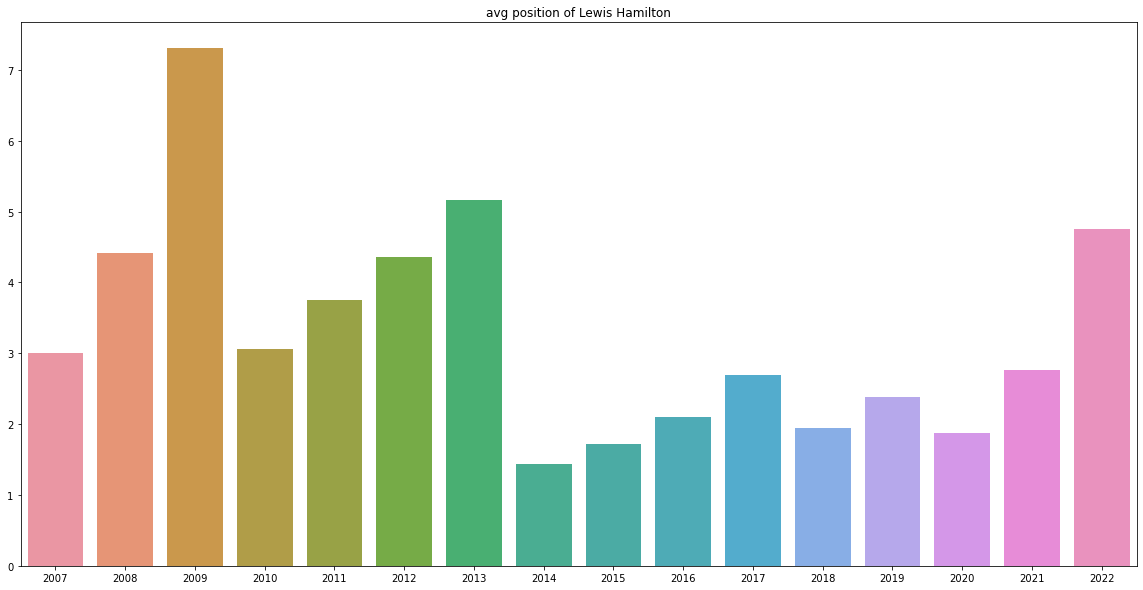

In [24]:
id_wanted = int(input('enter id of driver: '))
print(f'name={drivers_df[drivers_df["driverId"]==id_wanted]["forename"].values[0]} {drivers_df[drivers_df["driverId"]==id_wanted]["surname"].values[0]}')
# print all avg positon in sorted years
for key, value in sorted(racers_avg_pos_dict_per_year[id_wanted].items(), key=lambda x: x[0]):
    print(f'year={key}, avg_pos={value}')

# plot bar chart for each year
# plt.bar(racers_avg_pos_dict_per_year[id_wanted].keys(), racers_avg_pos_dict_per_year[id_wanted].values())
# plt it using seaborn
import seaborn as sns
# make it bigger
plt.figure(figsize=(20,10))
sns.barplot(x=list(racers_avg_pos_dict_per_year[id_wanted].keys()), y=list(racers_avg_pos_dict_per_year[id_wanted].values()))
# write down the name of the driver
plt.title(f'avg position of {drivers_df[drivers_df["driverId"]==id_wanted]["forename"].values[0]} {drivers_df[drivers_df["driverId"]==id_wanted]["surname"].values[0]}')